In [1]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import pydtmc

import pdb
# warnings.filterwarnings('ignore')

In [2]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

# ----- FIGURES -----
outp = os.path.join('figures','2024September')

In [3]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

C:\Users\Nerissa\anaconda3\envs\voc230824\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nerissa\anaconda3\envs\voc230824\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Nerissa\anaconda3\envs\voc230824\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\Nerissa\anaconda3\envs\voc230824\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Nerissa\anaconda3\envs\voc230824\lib\site-package

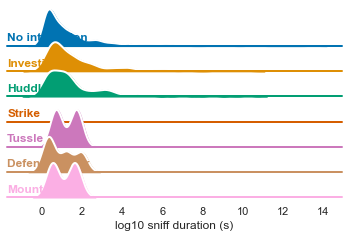

In [60]:
# ----- DO STUFF SCRATCH -----

# add next behavior to table
data['next_behav'] = data.groupby(['pair_tag','assay']).behavior.shift(periods=-1) # generate match of behavior to next behavior
data['log10transform'] = np.log10(data.duration)
usevar = 'duration'

# filter to sniffs
sniffs = data[data.behavior=='Sniff']

# test one assay
assay = 'introduction'
tdf = sniffs[sniffs.assay==assay]
tdf = tdf[tdf.sex=='F']
tdf = tdf[tdf.GT=='WT']

# plot duration distributions by following behavior
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.color_palette("colorblind")
g = sns.FacetGrid(tdf, row="next_behav", hue="next_behav", aspect=12, height=.5, palette=pal)
g.map(sns.kdeplot, usevar,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5,)
g.map(sns.kdeplot, usevar, clip_on=False, color="w", lw=2, bw_adjust=.5,)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False,)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.35)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "duration")

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="",xlabel='log10 sniff duration (s)')
g.despine(bottom=True, left=True)

In [29]:
np.var(tdf[tdf.next_behav=='No interaction'].duration)

2.5210652236023083

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_15032\1728212288.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tdf[tdf.next_behav=='No interaction'],x='duration',bw_adjust=.5,log_scale=(10,None))


<AxesSubplot: xlabel='duration', ylabel='Density'>

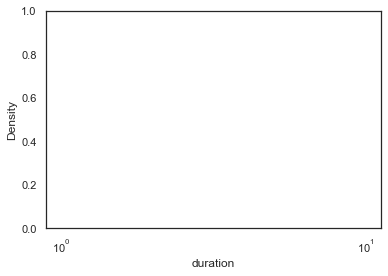

In [33]:
sns.kdeplot(data=tdf[tdf.next_behav=='No interaction'],x='duration',bw_adjust=.5,log_scale=(10,None))

In [146]:
saveplots = True

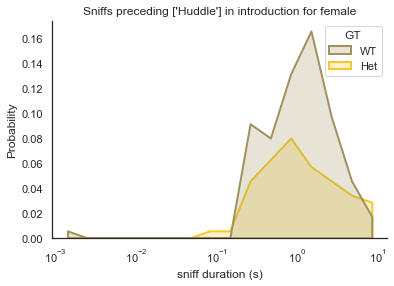

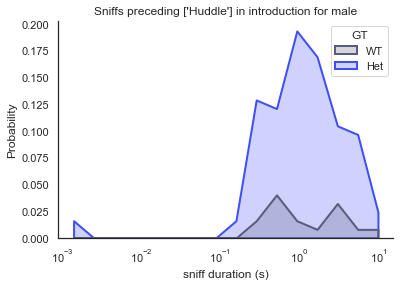

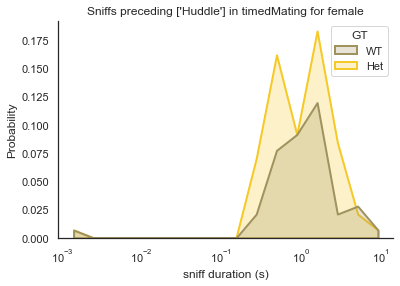

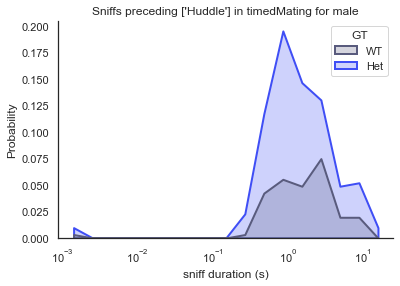

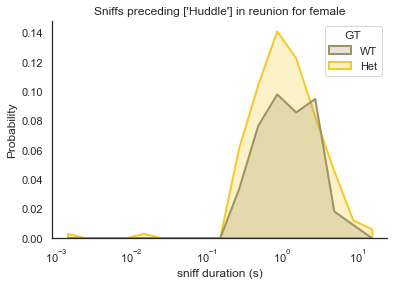

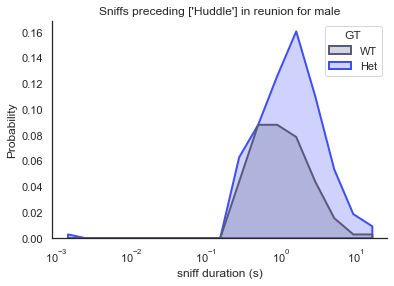

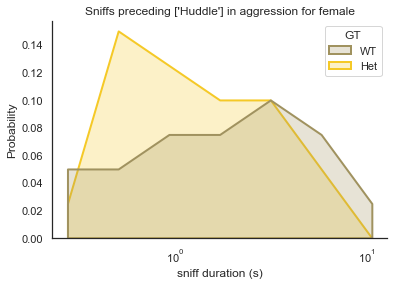

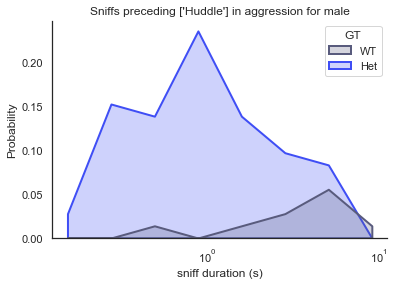

In [147]:
# ----- SNIFF TO HUDDLE TRANSITIONS -----

useb = ['Huddle']
bw = 0.25

assays = ['introduction','timedMating','reunion','aggression']
sexes = ['F','M']

bdf = sniffs[sniffs.next_behav.isin(useb)]
sns.set_theme(style="white")

for i,assay in enumerate(assays):
    for j,sex in enumerate(sexes):
        fname = f'sniffDuration_precedingHuddle_{assay}_{sex}.png'
        adf = bdf[bdf.assay==assay]
        sdf = adf[adf.sex==sex]
        
        if sex == 'F':
            pal = fpal
            sxtxt = 'female'
        else:
            pal = mpal
            sxtxt = 'male'
            
        
            
        f = plt.figure()

        h = sns.histplot(data=sdf,
                         x='duration',
                         fill=True, 
                         alpha=0.25, 
                         linewidth=2,
                         binwidth=bw,
                         stat='probability',
                         element='poly',
                         hue="GT", 
                         palette=pal,
                         hue_order=ho,
                         log_scale=(10,None),)
        sns.despine(top=True,right=True)
        h.set(xlabel='sniff duration (s)',title=f'Sniffs preceding {useb} in {assay} for {sxtxt}')
        
        if saveplots:
            f.savefig(os.path.join(outp,fname))

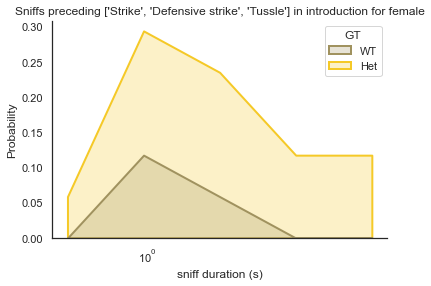

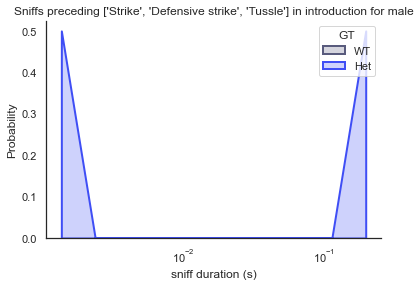

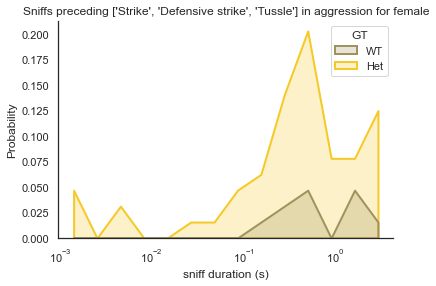

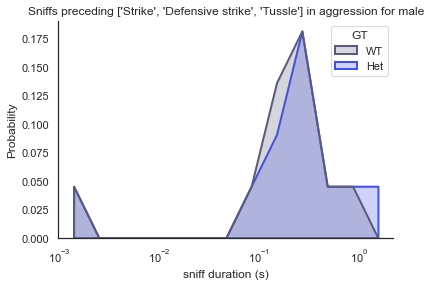

In [148]:
# ----- SNIFF TO AGGRESSION TRANSITIONS -----

useb = ['Strike','Defensive strike','Tussle']
bw = 0.25

assays = ['introduction','timedMating','reunion','aggression']
sexes = ['F','M']

bdf = sniffs[sniffs.next_behav.isin(useb)]
sns.set_theme(style="white")

for i,assay in enumerate(assays):
    for j,sex in enumerate(sexes):
        fname = f'sniffDuration_precedingAgonism_{assay}_{sex}.png'
        adf = bdf[bdf.assay==assay]
        sdf = adf[adf.sex==sex]
        
        if len(sdf)>1:
        
            if sex == 'F':
                pal = fpal
                sxtxt = 'female'
            else:
                pal = mpal
                sxtxt = 'male'

            f = plt.figure()

            h = sns.histplot(data=sdf,
                             x='duration',
                             fill=True, 
                             alpha=0.25, 
                             linewidth=2,
                             binwidth=bw,
                             stat='probability',
                             element='poly',
                             hue="GT", 
                             palette=pal,
                             hue_order=ho,
                             log_scale=(10,None),)
            sns.despine(top=True,right=True)
            h.set(xlabel='sniff duration (s)',title=f'Sniffs preceding {useb} in {assay} for {sxtxt}')

            if saveplots:
                f.savefig(os.path.join(outp,fname))

In [144]:
len(sdf)

1

Text(0.5, 0.98, 'Test')

<Figure size 432x288 with 0 Axes>

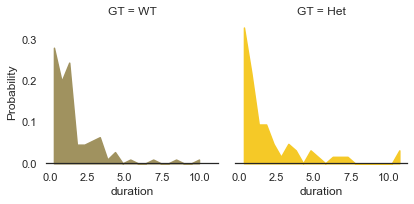

In [114]:
# ----- scratch sniff to huddle -----
assays = ['introduction','timedMating','reunion','aggression']

assay = 'introduction'
useb = 'Huddle'
sex = 'F'

tdf = sniffs[sniffs.assay==assay]
tdf = tdf[tdf.sex==sex]
tdf = tdf[tdf.next_behav==useb]

if sex == 'F':
    pal = fpal
else:
    pal = mpal

f = plt.figure()
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(tdf, col="GT",hue="GT", palette=pal,hue_order=ho,col_order=ho)

g.map(sns.histplot, usevar,
      clip_on=False,
      fill=True, alpha=1, linewidth=1.5,binwidth=0.5,stat='probability',
     element='poly')
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False,)


# Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[], ylabel="",xlabel='sniff duration (s)')
# g.despine(bottom=True, left=True)
g.despine(left=True)
f.suptitle('Test')

[Text(0.5, 0, 'sniff duration (s)'),
 Text(0.5, 1.0, 'Sniffs preceding Huddle in introduction')]

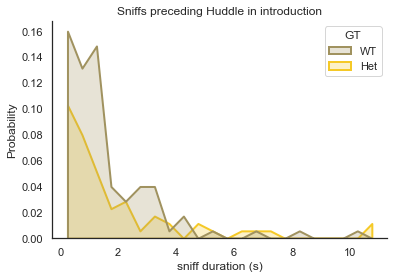

In [108]:
sns.set_theme(style="white")

h = sns.histplot(data=tdf,x='duration',
             fill=True, alpha=0.25, linewidth=2,binwidth=0.5,stat='probability',
             element='poly',
             hue="GT", palette=pal,hue_order=ho)
sns.despine(top=True,right=True)
h.set(xlabel='sniff duration (s)',title=f'Sniffs preceding {useb} in {assay}')

[Text(0.5, 0, 'sniff duration (s)'),
 Text(0.5, 1.0, "Sniffs preceding ['Strike', 'Tussle', 'Defensive strike'] in introduction")]

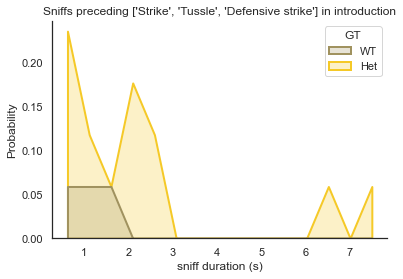

In [113]:
useb = ['Strike','Tussle','Defensive strike']

tdf = sniffs[sniffs.assay==assay]
tdf = tdf[tdf.sex==sex]
tdf = tdf[tdf.next_behav.isin(useb)]

h = sns.histplot(data=tdf,x='duration',
             fill=True, alpha=0.25, linewidth=2,binwidth=0.5,stat='probability',
             element='poly',
             hue="GT", palette=pal,hue_order=ho)
sns.despine(top=True,right=True)
h.set(xlabel='sniff duration (s)',title=f'Sniffs preceding {useb} in {assay}')

In [112]:
pd.unique(sniffs.next_behav)

array(['No interaction', 'Huddle', 'Investigate', 'Tussle', 'Strike',
       'Mount', 'Defensive rear', 'Aggression receipt', nan,
       'Defensive strike', 'Sniff'], dtype=object)